## PCA & Clustering Analysis on Delta Fleet Data set

Delta Airlines' website have data on all of their aircraft in a certain site section.
I will investigate the different aircraft in Delta’s fleet, including understanding quesitons such as which planes are similar, or which are dissimilar?

I'll begin by loading the fleet dataset and performing an initial inspection to understand the structure and types of variables.

In [21]:
# Load and Inspect the Data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()

In [22]:
delta_data.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


In [23]:
delta_data.size

1496

In [24]:
delta_data.dropna().size

1496

### Step 1: Check correlation with visualization
Before directly jump to PCA analysis, I'd like to visualize pairwise correlation using scatterplot for columns ``'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'`` (i.e., columns 16-23 in ``delta_data``) first, to have an overview of the correlation.

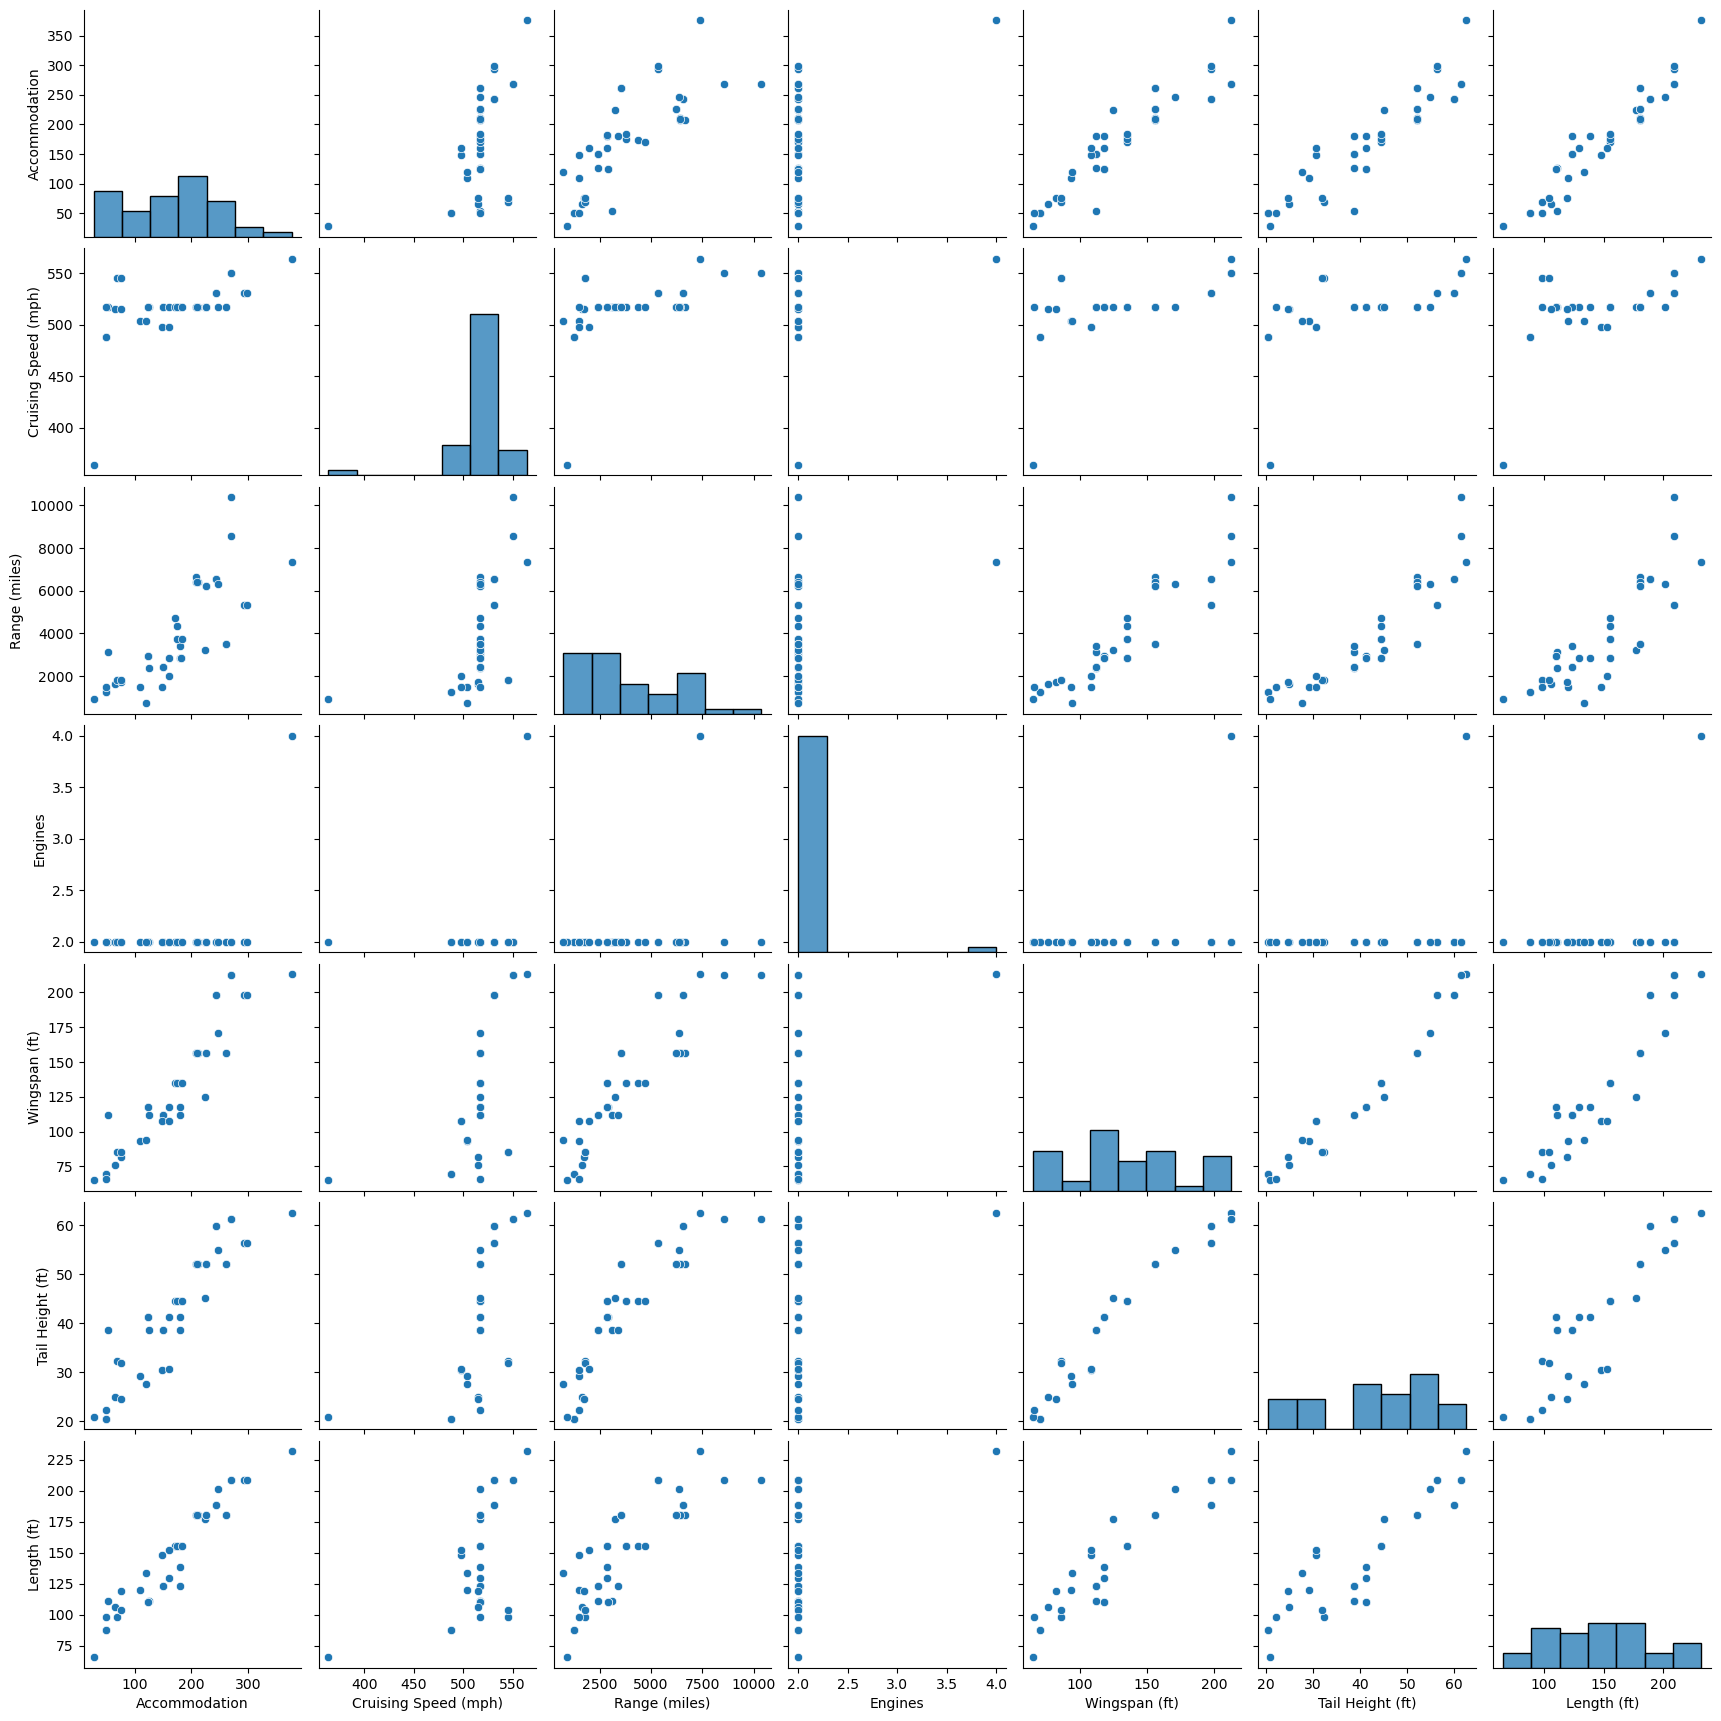

In [6]:
corr_data = delta_data.iloc[:,16:23]
sns.pairplot(data = corr_data)

### Step 2: Prepare X
Identify all binary columns (i.e., a binary column is the column that only contains ``0`` and ``1`` as values)

Generate a dataframe ``X`` removing these binary columns and column ``Aircraft`` (since this is the ``y``)

In [7]:
column = []
for n in range(len(delta_data.columns)):
    if delta_data.iloc[:,n].max() == 1 and delta_data.iloc[:,n].min() == 0:
        column.append(delta_data.columns[n])
column

['Wifi',
 'Video',
 'Power',
 'Satellite',
 'Flat-bed',
 'Sleeper',
 'Club',
 'First Class',
 'Business',
 'Eco Comfort',
 'Economy']

In [8]:
e2_data = delta_data.drop(columns = column)
e2_data = e2_data.drop(columns = "Aircraft")
e2_data.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Seat Width (Economy),Seat Pitch (Economy),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft)
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,30.5,96,126,517,2399,2,111.83,38.583,111.00
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,0.0,0.0,0,54,517,3119,2,111.83,38.583,111.00
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,18.0,30.5,181,243,531,6536,2,197.83,59.830,188.67


### Step 3: PCA
1. Standardize X
2. Conduct PCA 
3. Calculate the amount of varialce each principal component explain, as well as the cumulative sum
4. Visualize the cumulative sum of explained variance and set the xticks as the number of components


In [9]:
X_normalized = StandardScaler().fit_transform(e2_data)

In [10]:
pca = PCA().fit(X = X_normalized)

In [11]:
exp_var = pca.explained_variance_
exp_var_cumsum = np.cumsum(exp_var)
print(exp_var)
print(exp_var_cumsum)

[1.04262264e+01 5.65201809e+00 3.63035319e+00 1.05519623e+00
 8.12428121e-01 4.15157149e-01 2.13261825e-01 9.77054626e-02
 7.40529724e-02 3.22929422e-02 2.72044078e-02 2.14204117e-02
 1.77567781e-02 1.44812044e-02 8.74796869e-03 6.12186053e-03
 3.78826530e-03 2.51788920e-03 6.60186091e-04 2.36556438e-04
 8.90124266e-32 4.61572200e-33]
[10.42622639 16.07824448 19.70859767 20.76379391 21.57622203 21.99137918
 22.204641   22.30234646 22.37639944 22.40869238 22.43589679 22.4573172
 22.47507398 22.48955518 22.49830315 22.50442501 22.50821328 22.51073116
 22.51139135 22.51162791 22.51162791 22.51162791]


Text(0, 0.5, 'Cumulative Sum of Explained Variance')

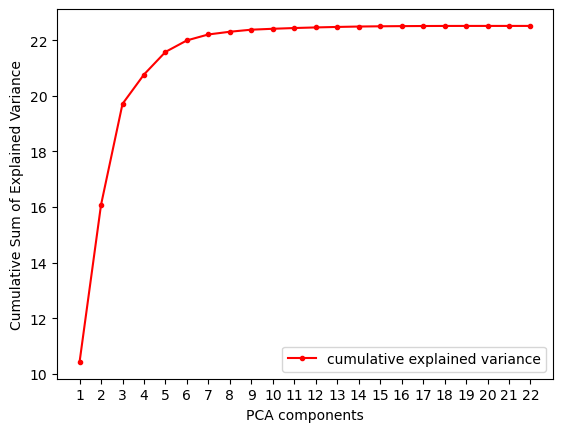

In [12]:
plt.plot(range(1, len(exp_var)+1), exp_var_cumsum, 'r.-', label = 'cumulative explained variance')
plt.legend()
ax = plt.gca()
ax.set_xticks(range(1, len(exp_var) + 1))
ax.set_xlabel('PCA components')
ax.set_ylabel('Cumulative Sum of Explained Variance')

Text(0, 0.5, 'Percentage of Explained Variance%')

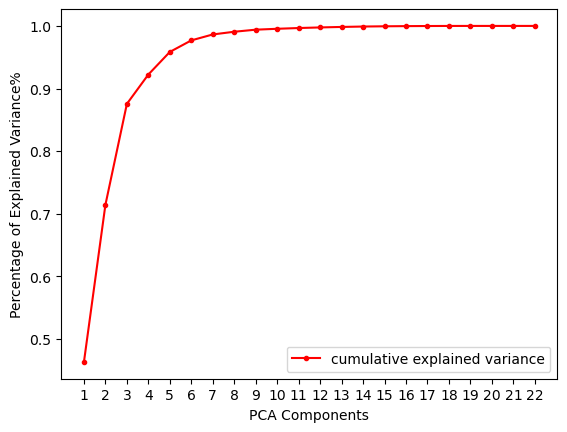

In [13]:
# In percentage
'''exp_var_cumsum_percentage = []
a = 0
for i in exp_var_cumsum:
    a = (i/exp_var_cumsum[-1])*100
    exp_var_cumsum_percentage.append(a)'''

exp_var_cumsum_percentage = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(exp_var)+1), exp_var_cumsum_percentage, 'r.-', label = 'cumulative explained variance')
plt.legend()
ax = plt.gca()
ax.set_xticks(range(1, len(exp_var) + 1))
ax.set_xlabel('PCA Components')
ax.set_ylabel('Percentage of Explained Variance%')

### Step 4: Clustering

So, now that I’ve simplified the complex data set into a lower dimensional space that I can visualize and
work with, I will use clustering to find patterns in the data, in this case, the aircraft which are most
similar. 

1. Pick the number of components which explain 90% (or a little greater) of the variation and represent the transformed data (projected onto the selected principal components) as ``components``

2. Using ``components`` as the input, run k-means for k from ``2`` to ``15`` (with ``random_state=1``), and visualize SSE by elbow curve.

3. Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment

4. Visualize the cluster membership by scatter plots (for each pair of principle components as ``x`` and ``y`` axes)

In [14]:
# According to my percentage, I'll go with 4 components
pca = PCA(n_components = 4)
components = pca.fit_transform(X_normalized)

Text(0, 0.5, 'SSE')

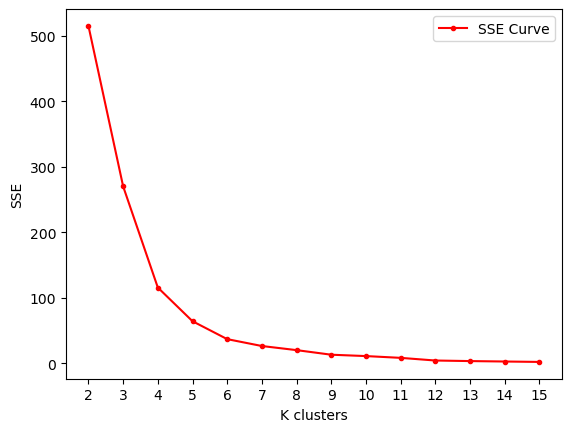

In [15]:
from sklearn.cluster import KMeans
SSE = []
for k in range(2, 16):
    km_model = KMeans(n_clusters = k, random_state = 1) 
    cls_assignment = km_model.fit_predict(components) 
    sse = km_model.inertia_
    SSE.append(sse)

plt.plot(range(2, 16), SSE, 'r.-', label = 'SSE Curve')
plt.legend()
ax = plt.gca()
ax.set_xticks(range(2, 16))
ax.set_xlabel('K clusters')
ax.set_ylabel('SSE')

In [16]:
# The drop occurred at around k = 4, I'll use this as my k
km_model = KMeans(n_clusters = 4, random_state = 1) 
cls_assignment = km_model.fit_predict(components) 
cls_assignment

array([0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0],
      dtype=int32)

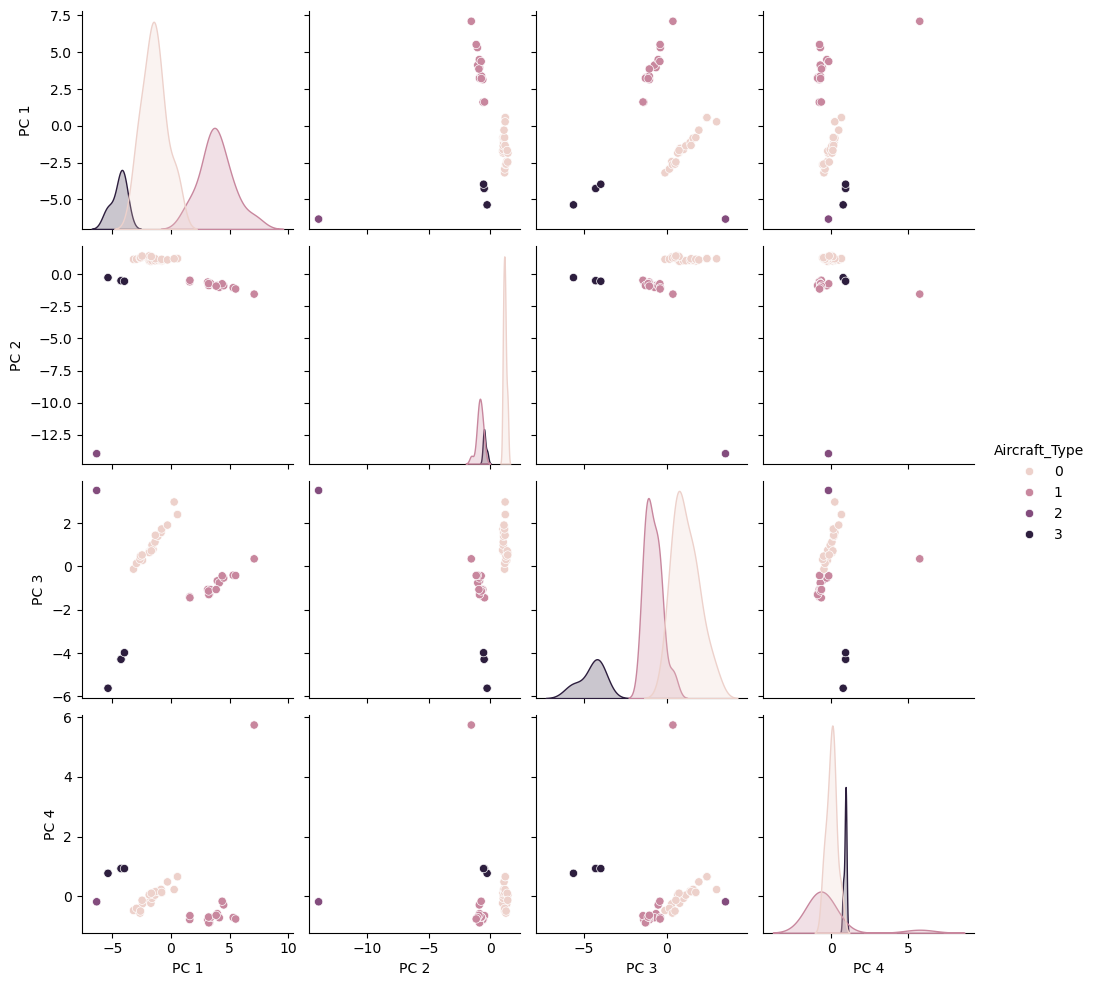

In [17]:
# Visualize the cluster membership by scatter plots (for each pair of principle components as x and y axes)
comp_df = pd.DataFrame(components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
comp_df['Aircraft_Type'] = cls_assignment
sns.pairplot(comp_df, hue = 'Aircraft_Type')